<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Task 1 - Become familiar with the dataset

Simple stats about the data

In [5]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


In [6]:
boston_df.describe(include='all')

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [7]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


Based on the quick analysis of the data, we can see, that the reading form csv, could be improved by updating, to "...=read_csv(url,index_col=0), to eliminate the Unnamed:0 column which is basicly the leftover indexing from the csv. But because the assignment doesn't ask to tuch the first part, I leav it that way and remove it like this:

In [8]:
boston_df=boston_df.drop(columns=['Unnamed: 0'])

In [9]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


# Task 2: Generate Descriptive Statistics and Visualizations

### Overview of the task:
Generate the following and explain your findings:

    2/A For the "Median value of owner-occupied homes" provide a boxplot

    2/B Provide a  bar plot for the Charles river variable

    2/C Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

    2/D Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

    2/E Create a histogram for the pupil to teacher ratio variable

### 2/A For the "Median value of owner-occupied homes" provide a boxplot

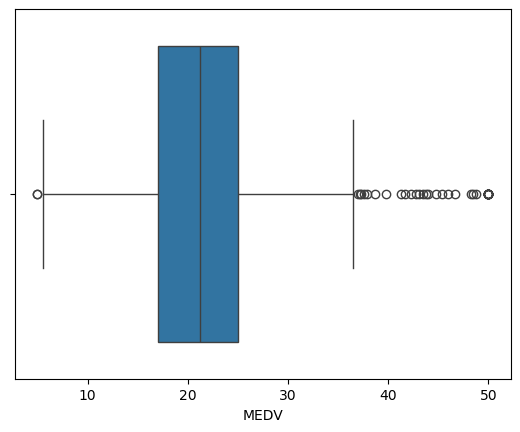

In [10]:
sns.boxplot(x='MEDV',  data=boston_df)
pyplot.show()

The box plot shows the median value of owner-occupied homes is about 22 (× 1000$). 

### 2/B Provide a  bar plot for the Charles river variable

Text(0.5, 1.0, 'Distribution of tracts bound by the river')

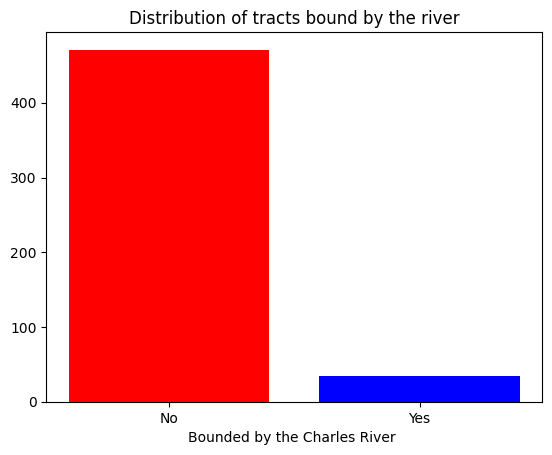

In [11]:
ax=pyplot.bar(boston_df.CHAS.unique().astype('str'), boston_df.CHAS.value_counts(), color=['red', 'blue'])
pyplot.xticks([0,1],["No","Yes"])
pyplot.xlabel('Bounded by the Charles River ')
pyplot.title('Distribution of tracts bound by the river')

### 2/3 Provide a boxplot for the MEDV variable vs the AGE variable. 
(Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

[Text(0.5, 0, 'Median value (×1000$)'), Text(0, 0.5, 'Age group')]

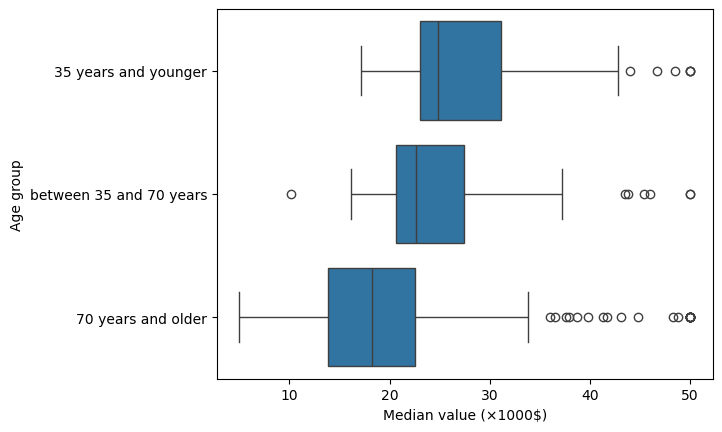

In [12]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

ax=sns.boxplot(x='MEDV', y='age_group', data=boston_df, order=["35 years and younger","between 35 and 70 years","70 years and older"])
ax.set(xlabel="Median value (×1000$)", ylabel="Age group")


The results suggest a clear declining of the median value as the property gets older. 

### 2/D Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

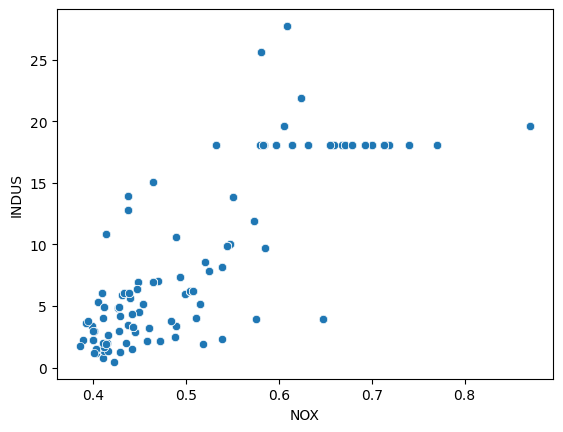

In [13]:
ax=sns.scatterplot(x='NOX', y='INDUS', data=boston_df)

The scatter plot suggests that the more nitricit oxide conatamination we find in the soil, the more likely there is a higher industrialization of the area. Or let's put it this way: The more industrialized the area, we are more likely to find higher concentration of nitricit oxide conatamination. These two statements are the two sides of the coin, but the latter is more close to the everyday viewing of things. We will test this in the 3/c

### 2/E Create a histogram for the pupil to teacher ratio variable

[Text(0.5, 0, 'Pupil to teacher ration')]

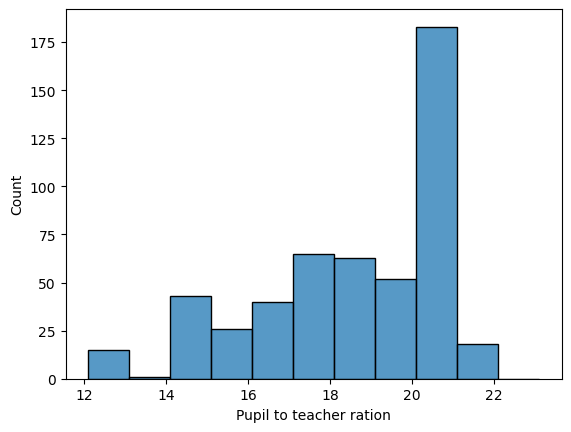

In [19]:
ax=sns.histplot(data=boston_df, x="PTRATIO",binwidth=1,discrete=True)
ax.set(xlabel="Pupil to teacher ration")

In an of itself, there is nothing much can be said about this. What is obvious, is that this distribution is not normal. 

# Task 3: Use the appropriate tests to answer the questions provided

### For each of the following questions;

    3/A Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

    3/B Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

    3/C Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

    3/D What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

### Be sure to:

    State your hypothesis.

    Use α = 0.05

    Perform the test Statistics.

    State the conclusion from the test.

###         3/A Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)



Here the H0 hypothesis is that there is no difference between the median value of a property bound by the river and not bound. 
The Ha is that there is a difference. 

First let's compute the Levene's probe to chechk wheather the variance of the two data set is equal.  (For this question H0_2: There is no difference in the variance)

In [20]:
scipy.stats.levene(boston_df[boston_df['CHAS']==0]['MEDV'],boston_df[boston_df['CHAS']==1]['MEDV'], center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

The result shows that we should reject the H0_2, and assume the variances are not the same for the two dataset. 

So based on our findings, we can set the parameters for the T test probperly:

In [21]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS']==0]['MEDV'],boston_df[boston_df['CHAS']==1]['MEDV'], equal_var=False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

The T test shows us that there we should reject the H0 hypothesis, so we have enough evidence that there is a significat difference between the median values of properties bound by the rier and not bound. 

###     3/B Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)


The H0 hypothesis is that there is no difference in the median value of the properties based on the age of the proportion. 
Ha is that there is one. 

Let's put this here to, to be able to rund the Task 3 problems independently form Task 2 problems.

In [24]:
boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

Let's the check the equality of variance here too:

In [26]:
scipy.stats.levene(boston_df[boston_df['age_group'] == '35 years and younger']['MEDV'],
                   boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV'], 
                   boston_df[boston_df['age_group'] == '70 years and older']['MEDV'], 
                   center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259205)

We cannot reject the equality of variances, here.

So based on that, let's calculate ANOVA ( follow the given example here, but it would be easier to first let's collect the ranges into different vectors, use them for the leven's and for the ANOVA too, it is less typing and calculation):

In [27]:
thirtyfive_lover = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
thirtyfive_seventy = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
seventy_older = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

f_statistic, p_value = scipy.stats.f_oneway(thirtyfive_lover, thirtyfive_seventy, seventy_older)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))


F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


The P value shows that we cannot reject the H0 hypothesis, which means we do not have enough evidence to assume there is a value difference based on the age group. 

###     3/C Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Let's test our H0 hypothesis which is: There is no correlation between the Nitricit oxide contamination and the industrialization of the property. Ha is that there is a correlation. 

In [29]:

scipy.stats.pearsonr(boston_df['INDUS'], boston_df['MEDV'])

PearsonRResult(statistic=-0.4837251600283721, pvalue=4.900259981753764e-31)

We can se form the Pearson correlation that there is a significant, strong correlation between the two variables. So we can think that there is a storng connection between the two variables. 

###     3/D What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Our H0 hypothesis here will be there is no impact of the additional weighted distance on the median value. Ha is that there is.

In [30]:
## X is the input variables (or independent variables)
X = boston_df['DIS']
## y is the target/dependent variable
y = boston_df['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 01 Aug 2024   Prob (F-statistic):           1.21e-08
Time:                        08:58:58   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The results show that, we can rejcet the H0, because P is ~0 (<0.05). Also it shows the value of the home goes up, as we distance ourself from the employment centers, which can be contra intuitve, because after a distance it can be seen as a cost (at least from here in Europe, but I know the distances work different in the US). 
It is not part of the task, but due to the contarintuitive nature of the results let's check how is it looks like on a scattered plot:

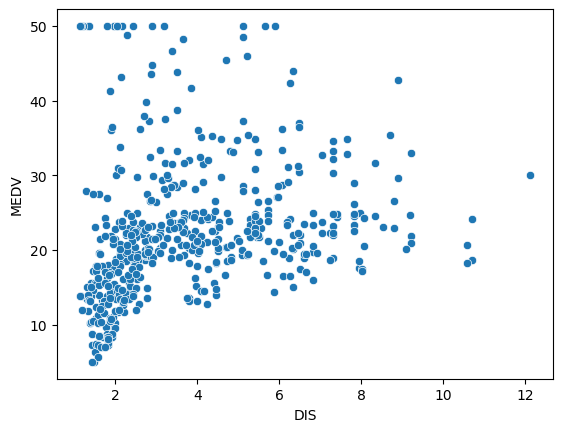

In [31]:
ax=sns.scatterplot(x='DIS', y='MEDV', data=boston_df)

This answeres our problem, it seems, a certian distance (~3 miles) affect the prices negatively, after that, there is no such dirct correlation. If we would cut down that part:


In [32]:
boston_df_alt=boston_df[boston_df['DIS']>3]

## X is the input variables (or independent variables)
X = boston_df_alt['DIS']
## y is the target/dependent variable
y = boston_df_alt['MEDV']
## add an intercept (beta_0) to our model
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.004
Method:                 Least Squares   F-statistic:                  0.008258
Date:                Thu, 01 Aug 2024   Prob (F-statistic):              0.928
Time:                        09:04:06   Log-Likelihood:                -909.66
No. Observations:                 266   AIC:                             1823.
Df Residuals:                     264   BIC:                             1830.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         25.1830      1.446     17.411      0.000      22.335      28.031
DIS           -0.0233      0.257     -0.091      0.928      -0.529       0.482
==============================================================================
Omnibus:                       64.117   Durbin-Watson:                   0.805
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.964
Skew:                           1.303   Prob(JB):                     2.95e-25
Kurtosis:                       4.843   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

As we thaught if we slice the data set into two part, we cannot find significant difference with properties more than 3 miles away from the employment centers. 